<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/04_pytorch_custom_datasets_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04. PyTorch Custom Datasets Exercises Template

Welcome to the 04. PyTorch Custom Datasets exercise template.

The best way to practice PyTorch code is to write more PyTorch code.

So read the original notebook and try to complete the exercises by writing code where it's required.

Feel free to reference the original resources whenever you need but should practice writing all of the code yourself.

## Resources

1. These exercises/solutions are based on [notebook 04 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/04_pytorch_custom_datasets/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/vsFMF9wqWx0).
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [4]:
# Check for GPU
!nvidia-smi


Sat May  6 02:43:51 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 531.18                 Driver Version: 531.18       CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                      TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1060 w...  WDDM | 00000000:01:00.0  On |                  N/A |
| N/A   58C    P8                6W /  N/A|   1095MiB /  6144MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [5]:
# Import torch
import torch
from torch import nn

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device


2.0.0+cu118


'cuda'

## 1. Our models are underperforming (not fitting the data well). What are 3 methods for preventing underfitting? Write them down and explain each with a sentence.

1. Use transfer learning. Helps prevent underfitting by using already existing patterns from one dataset and using them on your own problem.

2. Increase model complexity. Add more layers or larger layers to the model.

3. Increase duration of training the data. Increase the number of epochs.

## 2. Recreate the data loading functions we built in [sections 1, 2, 3 and 4 of notebook 04](https://www.learnpytorch.io/04_pytorch_custom_datasets/). You should have train and test `DataLoader`'s ready to use.

In [6]:
# 1. Get data
import requests
import zipfile
from pathlib import Path

# Setup path to a data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory already exists... skipping download")
else:
    print(f"{image_path} does not exist, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak and suhsi data
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
    request = requests.get(
        "https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip"
    )
    print("Downloading pizza, steak, sushi data...")
    f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
    print("Unzipping pizza, steak and sushi data...")
    zip_ref.extractall(image_path)


data\pizza_steak_sushi does not exist, creating one...
Unzipping pizza, steak and sushi data...


In [7]:
# 2. Become one with the data
import os


def walk_through_dir(dir_path):
    """Walks through dir_path returning file counts of its contents."""
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


In [8]:
walk_through_dir(image_path)


There are 2 directories and 0 images in 'data\pizza_steak_sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\test'.
There are 0 directories and 25 images in 'data\pizza_steak_sushi\test\pizza'.
There are 0 directories and 19 images in 'data\pizza_steak_sushi\test\steak'.
There are 0 directories and 31 images in 'data\pizza_steak_sushi\test\sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\train'.
There are 0 directories and 78 images in 'data\pizza_steak_sushi\train\pizza'.
There are 0 directories and 75 images in 'data\pizza_steak_sushi\train\steak'.
There are 0 directories and 72 images in 'data\pizza_steak_sushi\train\sushi'.


In [9]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir


(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

[WindowsPath('data/pizza_steak_sushi/test/pizza/1152100.jpg'), WindowsPath('data/pizza_steak_sushi/test/pizza/1503858.jpg'), WindowsPath('data/pizza_steak_sushi/test/pizza/1687143.jpg')]
data\pizza_steak_sushi\test\sushi\2394442.jpg
sushi
Random image path: data\pizza_steak_sushi\test\sushi\2394442.jpg
Image class: sushi
Image height: 408
Image width: 512


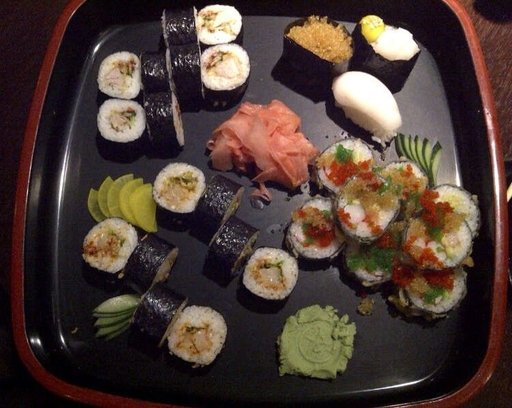

In [10]:
# Visualize an image
import random
from PIL import Image

# Set seed
random.seed(42)

# 1. Get all image paths (* means "any combination")
image_path_list = list(image_path.glob("*/*/*.jpg"))
print(image_path_list[:3])

# 2. Get random image path
random_image_path = random.choice(image_path_list)
print(random_image_path)

# 3. Get image class from path name
image_class = random_image_path.parent.stem
print(image_class)

# 4. Open image
img = Image.open(random_image_path)

# Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img


(-0.5, 511.5, 407.5, -0.5)

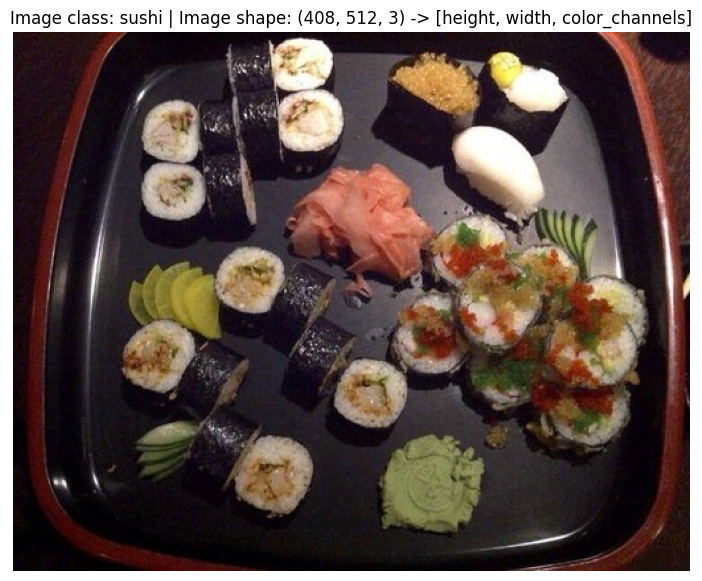

In [11]:
# Do the image visualization with matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(
    f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]"
)
plt.axis(False)


We've got some images in our folders.

Now we need to make them compatible with PyTorch by:
1. Transform the data into tensors.
2. Turn the tensor data into a `torch.utils.data.Dataset` and later a `torch.utils.data.DataLoader`.

In [12]:
# 3.1 Transforming data with torchvision.transforms
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


In [13]:
# Write transform for turning images into tensors
data_transform = transforms.Compose(
    [
        # Resize the images to 64x64x3 (64 height, 64 width, 3 color channels)
        transforms.Resize(size=(64, 64)),
        # Flip the images randomly on horizontal
        transforms.RandomHorizontalFlip(p=0.5),
        # Turn the image into a torch.Tensor
        transforms.ToTensor(),  # converts all pixel values from 0-255 to be between 0-1
    ]
)


In [14]:
random.sample(image_path_list, k=3)


[WindowsPath('data/pizza_steak_sushi/test/pizza/2508636.jpg'),
 WindowsPath('data/pizza_steak_sushi/train/pizza/5764.jpg'),
 WindowsPath('data/pizza_steak_sushi/train/pizza/3109486.jpg')]

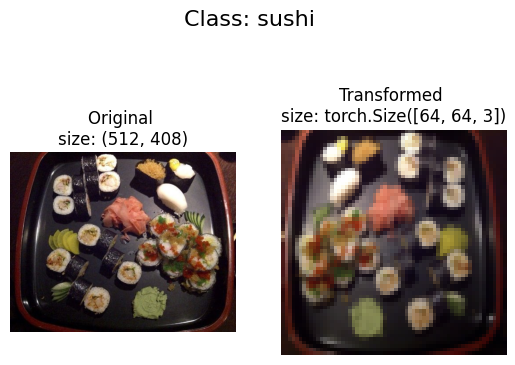

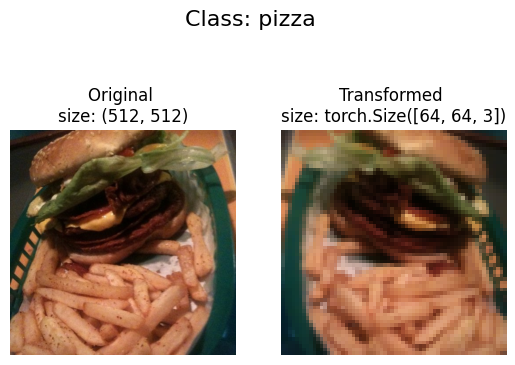

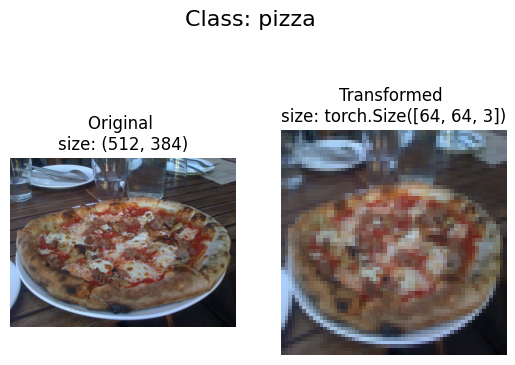

In [15]:
# Write a function to plot transformed images
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """Plots a series of random images from image_paths."""
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nsize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # permute() the image to make sure it's compatible with matplotlib
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nsize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)


plot_transformed_images(image_path_list, transform=data_transform, n=3)


### Load image data using `ImageFolder`

In [16]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets

train_data = datasets.ImageFolder(
    root=train_dir,  # target folder of images
    transform=data_transform,  # transforms to perform on data (images)
    target_transform=None,
)  # transforms to perform on labels (if necessary)

test_data = datasets.ImageFolder(root=test_dir, transform=data_transform, target_transform=None)

train_data, test_data


(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data\pizza_steak_sushi\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data\pizza_steak_sushi\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [17]:
# Get class names as a list
class_names = train_data.classes
class_names


['pizza', 'steak', 'sushi']

In [18]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict


{'pizza': 0, 'steak': 1, 'sushi': 2}

In [19]:
# Check the lengths of each dataset
len(train_data), len(test_data)


(225, 75)

In [20]:
# Turn train and test Datasets into DataLoaders
from torch.utils.data import DataLoader

BATCH_SIZE = 1
train_dataloader = DataLoader(
    dataset=train_data, batch_size=BATCH_SIZE, num_workers=0, shuffle=True
)

test_dataloader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, num_workers=0, shuffle=False)

train_dataloader, test_dataloader


(<torch.utils.data.dataloader.DataLoader at 0x148d69aff70>,
 <torch.utils.data.dataloader.DataLoader at 0x148d6d59580>)

In [21]:
# How many batches of images are in our data loaders?
len(train_dataloader), len(test_dataloader)


(225, 75)

In [22]:
img, label = next(iter(train_dataloader))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")


Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


## 3. Recreate `model_0` we built in section 7 of notebook 04.

In [23]:
import torch
from torch import nn


class TinyVGG(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(
                in_channels=input_shape,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1,
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1,
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )
        self.classifier = nn.Sequential(
            nn.Flatten(), nn.Linear(in_features=hidden_units * 16 * 16, out_features=output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        # print(f"Layer 1 shape: {x.shape}")
        x = self.conv_block_2(x)
        # print(f"Layer 2 shape: {x.shape}")
        x = self.classifier(x)
        # print(f"Layer 3 shape: {x.shape}")
        return x


In [24]:
model_0 = TinyVGG(input_shape=3, hidden_units=10, output_shape=len(class_names)).to(device)
model_0


TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [25]:
len(class_names)


3

In [26]:
# Pass dummy data through model
dummy_x = torch.rand(size=[1, 3, 64, 64])
model_0(dummy_x.to(device))


tensor([[-0.0191, -0.0066,  0.0227]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

## 4. Create training and testing functions for `model_0`.

In [27]:
def train_step(
    model: torch.nn.Module,
    dataloader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    optimizer: torch.optim.Optimizer,
):
    # Put the model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader and data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)
        # print(y_pred)

        # 2. Calculate and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumualte accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item() / len(y_pred)

    # Adjust metrics to get average loss and average accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc


In [28]:
def test_step(
    model: torch.nn.Module, dataloader: torch.utils.data.DataLoader, loss_fn: torch.nn.Module
):
    # Put model in eval mode
    model.eval()

    # Setup the test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)
            # print(test_pred_logits)

            # 2. Calculuate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += (test_pred_labels == y).sum().item() / len(test_pred_labels)

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc


In [29]:
from tqdm.auto import tqdm


def train(
    model: torch.nn.Module,
    train_dataloader: torch.utils.data.DataLoader,
    test_dataloader: torch.utils.data.DataLoader,
    optimizer: torch.optim.Optimizer,
    loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
    epochs: int = 5,
):
    # Create results dictionary
    results = {"train_loss": [], "train_acc": [], "test_loss": [], "test_acc": []}

    # Loop through the training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        # Train step
        train_loss, train_acc = train_step(
            model=model, dataloader=train_dataloader, loss_fn=loss_fn, optimizer=optimizer
        )
        # Test step
        test_loss, test_acc = test_step(model=model, dataloader=test_dataloader, loss_fn=loss_fn)

        # Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # Update the results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # Return the results dictionary
    return results


## 5. Try training the model you made in exercise 3 for 5, 20 and 50 epochs, what happens to the results?
* Use `torch.optim.Adam()` with a learning rate of 0.001 as the optimizer. 

In [30]:
# Train for 5 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_0 = TinyVGG(input_shape=3, hidden_units=10, output_shape=len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(), lr=0.001)

model_0_results = train(
    model=model_0,
    train_dataloader=train_dataloader,
    test_dataloader=test_dataloader,
    optimizer=optimizer,
    epochs=5,
)


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1174 | train_acc: 0.2978 | test_loss: 1.0964 | test_acc: 0.3333
Epoch: 2 | train_loss: 1.1002 | train_acc: 0.3111 | test_loss: 1.0996 | test_acc: 0.2533
Epoch: 3 | train_loss: 1.0994 | train_acc: 0.2933 | test_loss: 1.1002 | test_acc: 0.3333
Epoch: 4 | train_loss: 1.0991 | train_acc: 0.3289 | test_loss: 1.1000 | test_acc: 0.3333
Epoch: 5 | train_loss: 1.0995 | train_acc: 0.3378 | test_loss: 1.1004 | test_acc: 0.3333


In [31]:
# Train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_1 = TinyVGG(input_shape=3, hidden_units=10, output_shape=len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_1.parameters(), lr=0.001)

model_1_results = train(
    model=model_1,
    train_dataloader=train_dataloader,
    test_dataloader=test_dataloader,
    optimizer=optimizer,
    epochs=20,
)


  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1174 | train_acc: 0.2978 | test_loss: 1.0963 | test_acc: 0.3333
Epoch: 2 | train_loss: 1.1001 | train_acc: 0.3200 | test_loss: 1.0995 | test_acc: 0.2533
Epoch: 3 | train_loss: 1.0995 | train_acc: 0.2978 | test_loss: 1.1001 | test_acc: 0.3333
Epoch: 4 | train_loss: 1.0992 | train_acc: 0.3333 | test_loss: 1.0997 | test_acc: 0.3333
Epoch: 5 | train_loss: 1.0992 | train_acc: 0.3556 | test_loss: 1.0880 | test_acc: 0.4133
Epoch: 6 | train_loss: 1.1007 | train_acc: 0.3333 | test_loss: 1.1007 | test_acc: 0.3333
Epoch: 7 | train_loss: 1.0988 | train_acc: 0.3467 | test_loss: 1.1008 | test_acc: 0.3333
Epoch: 8 | train_loss: 1.1047 | train_acc: 0.3600 | test_loss: 1.1014 | test_acc: 0.3333
Epoch: 9 | train_loss: 1.0986 | train_acc: 0.3467 | test_loss: 1.1016 | test_acc: 0.3333
Epoch: 10 | train_loss: 1.0986 | train_acc: 0.3467 | test_loss: 1.1021 | test_acc: 0.3333
Epoch: 11 | train_loss: 1.0987 | train_acc: 0.3467 | test_loss: 1.1021 | test_acc: 0.3333
Epoch: 12 | train_l

In [32]:
# Train for 50 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_2 = TinyVGG(input_shape=3, hidden_units=10, output_shape=len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_2.parameters(), lr=0.001)

model_2_results = train(
    model=model_2,
    train_dataloader=train_dataloader,
    test_dataloader=test_dataloader,
    optimizer=optimizer,
    epochs=50,
)


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1173 | train_acc: 0.2978 | test_loss: 1.0966 | test_acc: 0.3333
Epoch: 2 | train_loss: 1.1002 | train_acc: 0.3289 | test_loss: 1.0992 | test_acc: 0.2533
Epoch: 3 | train_loss: 1.0997 | train_acc: 0.3689 | test_loss: 1.0985 | test_acc: 0.3867
Epoch: 4 | train_loss: 1.0508 | train_acc: 0.4933 | test_loss: 1.0450 | test_acc: 0.5333
Epoch: 5 | train_loss: 0.9198 | train_acc: 0.6178 | test_loss: 1.0116 | test_acc: 0.5333
Epoch: 6 | train_loss: 0.9221 | train_acc: 0.5822 | test_loss: 0.9631 | test_acc: 0.4800
Epoch: 7 | train_loss: 0.8585 | train_acc: 0.5956 | test_loss: 0.9838 | test_acc: 0.5200
Epoch: 8 | train_loss: 0.8560 | train_acc: 0.6133 | test_loss: 0.9593 | test_acc: 0.4533
Epoch: 9 | train_loss: 0.8045 | train_acc: 0.6356 | test_loss: 0.9786 | test_acc: 0.4533
Epoch: 10 | train_loss: 0.7806 | train_acc: 0.6578 | test_loss: 0.9969 | test_acc: 0.4933
Epoch: 11 | train_loss: 0.7433 | train_acc: 0.6800 | test_loss: 1.0104 | test_acc: 0.4667
Epoch: 12 | train_l

It looks like our model is starting to overfit towards the end (performing far better on the training data than on the testing data).

In order to fix this, we'd have to introduce ways of preventing overfitting.

## 6. Double the number of hidden units in your model and train it for 20 epochs, what happens to the results?

In [33]:
# Double the number of hidden units and train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_3 = TinyVGG(
    input_shape=3,
    hidden_units=20,  # use 20 hidden units instead of 10
    output_shape=len(class_names),
).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_3.parameters(), lr=0.001)

model_3_results = train(
    model=model_3,
    train_dataloader=train_dataloader,
    test_dataloader=test_dataloader,
    optimizer=optimizer,
    epochs=20,
)  # train for 20 epochs


  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0908 | train_acc: 0.3822 | test_loss: 1.0801 | test_acc: 0.3600
Epoch: 2 | train_loss: 1.1002 | train_acc: 0.3289 | test_loss: 1.0992 | test_acc: 0.3333
Epoch: 3 | train_loss: 1.0989 | train_acc: 0.3289 | test_loss: 1.0989 | test_acc: 0.3333
Epoch: 4 | train_loss: 1.1007 | train_acc: 0.3467 | test_loss: 1.1002 | test_acc: 0.3333
Epoch: 5 | train_loss: 1.0989 | train_acc: 0.3244 | test_loss: 1.1009 | test_acc: 0.3333
Epoch: 6 | train_loss: 1.1012 | train_acc: 0.4044 | test_loss: 1.0226 | test_acc: 0.5200
Epoch: 7 | train_loss: 1.0289 | train_acc: 0.5067 | test_loss: 0.9927 | test_acc: 0.5067
Epoch: 8 | train_loss: 0.9257 | train_acc: 0.5867 | test_loss: 0.9909 | test_acc: 0.5733
Epoch: 9 | train_loss: 0.8572 | train_acc: 0.6356 | test_loss: 1.0500 | test_acc: 0.4800
Epoch: 10 | train_loss: 0.8049 | train_acc: 0.6622 | test_loss: 1.0273 | test_acc: 0.4533
Epoch: 11 | train_loss: 0.7945 | train_acc: 0.6622 | test_loss: 1.2406 | test_acc: 0.4533
Epoch: 12 | train_l

It looks like the model is still overfitting, even when changing the number of hidden units.

To fix this, we'd have to look at ways to prevent overfitting with our model.

## 7. Double the data you're using with your model from step 6 and train it for 20 epochs, what happens to the results?
* **Note:** You can use the [custom data creation notebook](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/04_custom_data_creation.ipynb) to scale up your Food101 dataset.
* You can also find the [already formatted double data (20% instead of 10% subset) dataset on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/data/pizza_steak_sushi_20_percent.zip), you will need to write download code like in exercise 2 to get it into this notebook.

In [34]:
# Download 20% data for Pizza/Steak/Sushi from GitHub
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi_20_percent"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak, sushi data
with open(data_path / "pizza_steak_sushi_20_percent.zip", "wb") as f:
    request = requests.get(
        "https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip"
    )
    print("Downloading pizza, steak, sushi 20% data...")
    f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi_20_percent.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, sushi 20% data...")
    zip_ref.extractall(image_path)


Did not find data\pizza_steak_sushi_20_percent directory, creating one...
Unzipping pizza, steak, sushi 20% data...


In [35]:
# See how many images we have
walk_through_dir(image_path)


There are 2 directories and 0 images in 'data\pizza_steak_sushi_20_percent'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi_20_percent\test'.
There are 0 directories and 46 images in 'data\pizza_steak_sushi_20_percent\test\pizza'.
There are 0 directories and 58 images in 'data\pizza_steak_sushi_20_percent\test\steak'.
There are 0 directories and 46 images in 'data\pizza_steak_sushi_20_percent\test\sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi_20_percent\train'.
There are 0 directories and 154 images in 'data\pizza_steak_sushi_20_percent\train\pizza'.
There are 0 directories and 146 images in 'data\pizza_steak_sushi_20_percent\train\steak'.
There are 0 directories and 150 images in 'data\pizza_steak_sushi_20_percent\train\sushi'.


Excellent, we now have double the training and testing images... 

In [36]:
# Create the train and test paths
train_data_20_percent_path = image_path / "train"
test_data_20_percent_path = image_path / "test"

train_data_20_percent_path, test_data_20_percent_path


(WindowsPath('data/pizza_steak_sushi_20_percent/train'),
 WindowsPath('data/pizza_steak_sushi_20_percent/test'))

In [37]:
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader

simple_transform = transforms.Compose([transforms.Resize((64, 64)), transforms.ToTensor()])

train_data_20_percent = ImageFolder(train_data_20_percent_path, transform=simple_transform)

test_data_20_percent = ImageFolder(test_data_20_percent_path, transform=simple_transform)

# Create dataloaders
train_dataloader_20_percent = DataLoader(
    train_data_20_percent, batch_size=32, num_workers=0, shuffle=True
)

test_dataloader_20_percent = DataLoader(
    test_data_20_percent, batch_size=32, num_workers=0, shuffle=False
)


In [38]:
# Train a model with increased amount of data
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_4 = TinyVGG(
    input_shape=3,
    hidden_units=20,  # use 20 hidden units instead of 10
    output_shape=len(class_names),
).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_4.parameters(), lr=0.001)

model_4_results = train(
    model=model_4,
    train_dataloader=train_dataloader_20_percent,  # use double the training data
    test_dataloader=test_dataloader_20_percent,  # use double the testing data
    optimizer=optimizer,
    epochs=20,
)  # train for 20 epochs


  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1042 | train_acc: 0.3312 | test_loss: 1.1004 | test_acc: 0.2875
Epoch: 2 | train_loss: 1.0841 | train_acc: 0.3542 | test_loss: 1.0767 | test_acc: 0.3187
Epoch: 3 | train_loss: 1.0327 | train_acc: 0.4313 | test_loss: 0.9646 | test_acc: 0.5017
Epoch: 4 | train_loss: 0.9127 | train_acc: 0.5500 | test_loss: 0.9104 | test_acc: 0.5631
Epoch: 5 | train_loss: 0.8634 | train_acc: 0.6250 | test_loss: 0.9343 | test_acc: 0.4835
Epoch: 6 | train_loss: 0.8083 | train_acc: 0.6312 | test_loss: 1.0170 | test_acc: 0.4932
Epoch: 7 | train_loss: 0.8795 | train_acc: 0.5854 | test_loss: 0.8893 | test_acc: 0.5693
Epoch: 8 | train_loss: 0.7921 | train_acc: 0.6667 | test_loss: 0.8789 | test_acc: 0.5886
Epoch: 9 | train_loss: 0.7905 | train_acc: 0.6813 | test_loss: 0.9157 | test_acc: 0.5142
Epoch: 10 | train_loss: 0.8058 | train_acc: 0.6542 | test_loss: 0.8879 | test_acc: 0.6386
Epoch: 11 | train_loss: 0.7556 | train_acc: 0.6729 | test_loss: 0.8718 | test_acc: 0.6006
Epoch: 12 | train_l

## 8. Make a prediction on your own custom image of pizza/steak/sushi (you could even download one from the internet) with your trained model from exercise 7 and share your prediction. 
* Does the model you trained in exercise 7 get it right? 
* If not, what do you think you could do to improve it?

In [39]:
# Get a custom image
custom_image = "pizza_dad.jpeg"
with open("pizza_dad.jpeg", "wb") as f:
    request = requests.get(
        "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg"
    )
    f.write(request.content)


In [40]:
# Load the image
import torchvision

img = torchvision.io.read_image(custom_image)
img


tensor([[[154, 175, 181,  ...,  21,  18,  14],
         [146, 167, 180,  ...,  21,  18,  15],
         [124, 146, 171,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 189, 193,  ...,  22,  19,  15],
         [163, 181, 194,  ...,  22,  19,  16],
         [141, 163, 185,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 106, 104, 102],
         [ 47,  38,  24,  ..., 108, 105, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[117, 138, 145,  ...,  17,  14,  10],
         [109, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  54,  52,  50],
         [ 27,  18,   4,  ...,  50,  47,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)

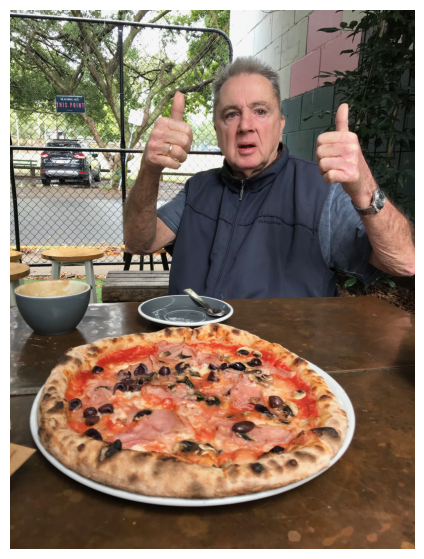

In [41]:
# View the image
plt.figure(figsize=(10, 7))
plt.imshow(
    img.permute(1, 2, 0)
)  # matplotlib likes images in HWC (height, width, color_channels) format not CHW (color_channels, height, width)
plt.axis(False)


c:\Projects\pytorch-course\venv\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


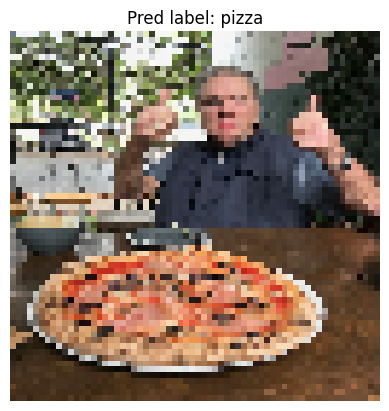

In [42]:
# Make a prediction on the image
model_4.eval()
with torch.inference_mode():
    # Get image pixels into float + between 0 and 1
    img = img / 255.0

    # Resize image to 64x64
    resize = transforms.Resize((64, 64))
    img = resize(img)

    # Turn image in single batch and pass to target device
    batch = img.unsqueeze(0).to(device)

    # Predict on image
    y_pred_logit = model_4(batch)

    # Convert pred logit to pred label
    # pred_label = torch.argmax(torch.softmax(y_pred_logit, dim=1), dim=1)
    pred_label = torch.argmax(
        y_pred_logit, dim=1
    )  # get same results as above without torch.softmax

# Plot the image and prediction
plt.imshow(img.permute(1, 2, 0))
plt.title(f"Pred label: {class_names[pred_label]}")
plt.axis(False)
